In [1]:
import numpy as np
from scipy.linalg import sqrtm
import scipy as sc
import qiskit
import random
import matplotlib.pyplot as plt
import scipy
import qiskit.providers.aer.noise as noise
from numpy import pi
from qiskit.quantum_info import Statevector
from qiskit.extensions import HamiltonianGate
from qiskit.circuit.library import MCMT
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble, Aer, IBMQ, execute

#from qiskit import IBMQ
#IBMQ.save_account('17d122182eb4e926eb789e55bc17a49c8e19335a70ee99a60213185d0a573876b81b71d8bd70adb55b8c0941b68ed8484b9218787ba2e1349edc2cdb9bbe0c9e')

from qiskit.algorithms.linear_solvers.numpy_linear_solver import NumPyLinearSolver
from qiskit.algorithms.linear_solvers.hhl import HHL
from qiskit.algorithms.linear_solvers.matrices import TridiagonalToeplitz
from qiskit.algorithms.linear_solvers.observables import MatrixFunctional
from scipy.optimize import curve_fit
from qiskit.visualization import plot_histogram, plot_bloch_multivector

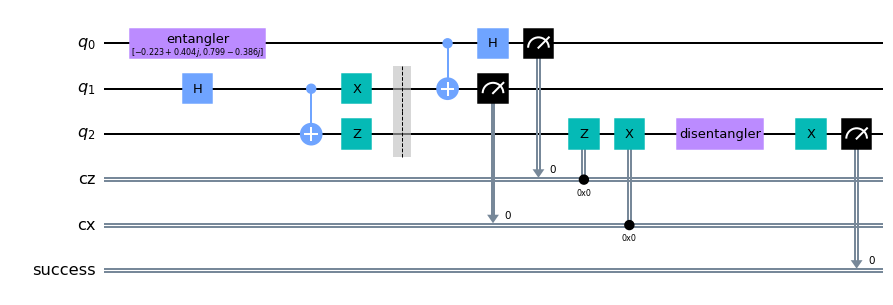

In [2]:
qreg_q = QuantumRegister(3, 'q')
creg_c1 = ClassicalRegister(1, 'cz')
creg_c2 = ClassicalRegister(1, 'cx')
creg_success = ClassicalRegister(1, 'success')
circuit = QuantumCircuit(qreg_q, creg_c1, creg_c2, creg_success)

#generation of the random 1 qubit state according to Haar measure
state=np.array([[np.random.normal()+1j*np.random.normal()] for i in range(2)])
state=state/np.sqrt(state.T.conjugate()@state)
state=state.T[0]
init=qiskit.extensions.Initialize(state)
init.label='entangler'
circuit.append(init,[0])
#quantum teleportation
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.x(qreg_q[1])
circuit.z(qreg_q[2])
circuit.barrier(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c1[0])
circuit.measure(qreg_q[1], creg_c2[0])
circuit.z(qreg_q[2]).c_if(creg_c1, 0)
circuit.x(qreg_q[2]).c_if(creg_c2, 0)
#uncomputing of the state
circuit.append(init.gates_to_uncompute(),[2])
circuit.x(qreg_q[2])
circuit.measure(qreg_q[2], creg_success[0])
#drawing of the quantum circuit
circuit.draw("mpl")

In [3]:
qasm_sim = Aer.get_backend('qasm_simulator')
results = execute(circuit, qasm_sim,shots=1000).result()

In [4]:
results.get_counts(circuit)

{'1 0 0': 259, '1 0 1': 244, '1 1 0': 255, '1 1 1': 242}

In [5]:
state

array([-0.22295674+0.40398615j,  0.79893476-0.38573141j])